In [1]:
import pandas as pd
import numpy as np
import os
import string
import  math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
close_price = pd.DataFrame()
open_price = pd.DataFrame()
high_price = pd.DataFrame()
low_price = pd.DataFrame()
volume = pd.DataFrame()

close_price = pd.read_csv("data/close.csv")
open_price = pd.read_csv("data/open.csv")
high_price = pd.read_csv("data/high.csv")
low_price = pd.read_csv("data/low.csv")
volume = pd.read_csv("data/volume.csv")

#[if i in close_price[file_name.split('.')[0]] == NaN]
close_price = close_price.dropna(axis=1, thresh=1257)  
open_price = open_price.dropna(axis=1, thresh=1257)  
high_price = high_price.dropna(axis=1, thresh=1257)  
low_price = low_price.dropna(axis=1, thresh=1257)  
volume = volume.dropna(axis=1, thresh=1257)  

close_price.to_csv("close1.csv", index=False)

f = open("close1.csv")
stocks = f.readline()
stocks = stocks.split(",")

stocks.pop(0)
stocks[len(stocks) - 1] = stocks[len(stocks) - 1][:-1]
f.close()
stocks_dict = {}
j = 0
for i in stocks:
    stocks_dict[i] = j
    j += 1

In [3]:
for i in stocks:
    for j in range(1, 1257):
        if (j >= 6 and close_price[i][j] >= 1.15 * close_price[i][j - 1]) or (j >= 6 and close_price[i][j] <= 0.85 * close_price[i][j - 1]):   
            print(j, i)
            del close_price[i]
            del open_price[i]
            del high_price[i]
            del low_price[i]
            del volume[i]
            break
open_price['hum'][1043] = 107.39

213 dxcm
441 laws
678 cig
1037 sig
638 edu
1247 phx
458 evr
316 amsc
41 nc
760 infy
1100 dks
212 mtz
216 ueps
1233 sdrl
590 vsi
32 nr
87 rbs
466 irdm
36 faro
404 foxa
321 slgn
78 uis
387 pq
401 prft
10 ftft
487 nna
1240 nmm
6 apri
168 ddc
432 avdl
82 simo
212 acls
60 arql
234 gst
124 onp
901 pxd
87 krg
61 rvlt
216 ntwk
28 snmx
337 achn
637 alny
458 fcbc
441 csu
68 acad
351 ebs
154 pdli
327 ixys
350 cga
653 acm
319 quik
9 snoa
191 axu
217 csco
73 arry
996 jbl
401 mgi
120 abcb
323 ago
284 type
741 sam
841 ctrp
852 tnp
399 cir
834 gib
102 apc
211 tgb
30 uctt
235 lxrx
87 san
381 farm
13 cris
401 tkr
86 camp
457 rtk
417 ric
174 mdgl
85 hil
665 hain
217 srdx
540 dwsn
984 cco
80 bc
1063 ldos
362 abr
955 enlc
58 tenx
137 hbhc
562 pnr
204 dzsi
282 nsit
401 dk
441 bfin
1028 bbg
40 eth
735 fcx
224 regn
458 agx
160 kem
458 mt
645 tsco
537 afam
87 hov
441 cvo
39 prsc
709 nyt
232 gntx
938 htz
632 bpi
401 ccrn
569 cnc
1031 bwp
100 pay
335 cenx
322 svu
264 wstl
32 csiq
897 sqm
488 coo
458 spok
213 cba

646 saia
109 gden
523 rsys
172 crox
444 csii
148 rgs
233 cytk
171 nby
839 cutr
164 imgn
216 exk
21 lrad
329 iivi
401 cgg
87 nxst
793 iep
139 mnta
488 aobc
197 smed
327 biib
841 ofix
146 syke
482 ktos
398 rexx
112 vg
52 atsg
99 gtxi
159 crm
710 var
396 sbra
62 aezs
402 lby
377 zn
846 lway
84 clmt
48 arii
390 avid
741 rigl
1219 ande
440 bpop
441 iboc
433 scs
138 aeis
332 tgs
1031 dave
90 pbh
401 gbx
441 belfb
139 algn
49 btx
588 bebe
16 rprx
402 lbai
1122 kmx
456 mli
87 nvax
37 nuva
313 matx
650 see
823 ngd
1206 ncr
87 bbva
578 mpaa
627 azz
754 lndc
520 ceqp
155 vgz
140 nymx
1220 ev
143 bbw
55 rdn
147 web
79 bwld
416 lgnd
441 wtba
441 ctg
401 usg
283 aan
109 ten
143 cmpr
50 uve
66 dfbg
31 clw
371 drrx
272 cyou
1020 ksu
212 echo
181 adbe
1019 gatx
247 anip
62 mvis
149 atec
645 phm
441 buse
528 inod
649 arcb
401 tds
18 cie
595 thm
394 labl
533 xec
401 opy
45 gtn
100 hurc
279 diod
401 bac
464 immr
402 pebo
151 pega
440 dht
174 infi
29 husa
84 usat
966 endp
692 clb
73 cur
927 ufs
207 sfly
84

In [4]:
close_price.to_csv("close2.csv", index=False)

f = open("close2.csv")
stocks = f.readline()
stocks = stocks.split(",")

stocks.pop(0)
stocks[len(stocks) - 1] = stocks[len(stocks) - 1][:-1]
f.close()
stocks_dict = {}
j = 0
for i in stocks:
    stocks_dict[i] = j
    j += 1

In [5]:

#Векторы доходности. Устраняю резкие скачки цен
print(close_price)
r = np.zeros((1252, len(stocks)))
booksize = 1

for i in stocks:
    for j in range(5, 1257):
        #print(close_price[j - 1][i])
        r[j - 5][stocks_dict[i]] = (close_price[i][j] / close_price[i][j - 1]) - booksize

      Unnamed: 0  gilt   denn     xom       gf     pck    coke    ipcc  \
0     2010-01-04  4.94   2.25  55.968   6.0042  5.5131  49.719  35.740   
1     2010-01-05  5.11   2.23  56.188   6.0481  5.5386  48.465  34.990   
2     2010-01-06  5.18   2.23  56.675   6.1309  5.6333  48.662  34.745   
3     2010-01-07  5.52   2.29  56.497   6.1454  5.5954  47.992  34.842   
4     2010-01-08  5.60   2.32  56.270   6.1504  5.5954  47.779  34.782   
...          ...   ...    ...     ...      ...     ...     ...     ...   
1252  2014-12-24  4.80   9.96  83.730  12.1430  7.9896  86.557  71.193   
1253  2014-12-26  4.76   9.98  83.221  12.3260  7.9642  86.912  71.493   
1254  2014-12-29  4.76   9.99  83.094  12.0450  7.9563  86.313  71.511   
1255  2014-12-30  4.75  10.07  83.052  11.8410  7.9727  86.676  72.652   
1256  2014-12-31  4.66  10.31  82.544  11.8510  8.0066  86.397  72.278   

         msd      baf  ...   jblu       cb      ups     rio      nxj     igr  \
0     6.3556   9.2456  ...   5.

In [6]:
print(r[1][0])
print(r[0][0])
print(close_price['dxcm'][5])
print(close_price['dxcm'][6])
print(close_price['dxcm'][4])


-0.0035149384885765356
0.016071428571428736


KeyError: 'dxcm'

In [9]:
r

array([[ 0.01607143,  0.00431034,  0.01119602, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00351494, -0.00858369, -0.00497364, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01410935,  0.        , -0.0040094 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.001002  , -0.00152606, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00210084,  0.00800801, -0.00050545, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01894737,  0.02383317, -0.00611665, ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
close_price

,Unnamed: 0,gilt,denn,xom,gf,pck,coke,ipcc,msd,baf,...,jblu,cb,ups,rio,nxj,igr,nmz,spxc,trs,ifn
0,2010-01-04,4.94,2.25,55.968,6.0042,5.5131,49.719,35.740,6.3556,9.2456,...,5.56,41.872,47.829,42.533,8.8752,4.2713,7.9701,13.292,7.19,17.904
1,2010-01-05,5.11,2.23,56.188,6.0481,5.5386,48.465,34.990,6.4006,9.1954,...,5.86,40.928,47.910,43.193,8.9955,4.3248,8.0257,13.099,7.19,18.192
2,2010-01-06,5.18,2.23,56.675,6.1309,5.6333,48.662,34.745,6.3942,9.1820,...,5.73,40.369,47.556,44.514,8.9024,4.3713,8.1041,13.254,7.06,18.378
3,2010-01-07,5.52,2.29,56.497,6.1454,5.5954,47.992,34.842,6.4134,9.1363,...,5.86,40.599,47.194,44.521,8.9654,4.4910,8.1111,13.902,7.33,18.287
4,2010-01-08,5.60,2.32,56.270,6.1504,5.5954,47.779,34.782,6.4907,9.2320,...,5.80,40.369,49.464,45.015,9.0285,4.5512,8.1668,14.258,7.49,18.153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2014-12-24,4.80,9.96,83.730,12.1430,7.9896,86.557,71.193,7.5895,12.2860,...,15.50,108.560,102.870,38.508,11.5070,7.2445,11.2320,21.611,31.85,21.716
1253,2014-12-26,4.76,9.98,83.221,12.3260,7.9642,86.912,71.493,7.6143,12.3140,...,15.68,108.730,102.440,39.208,11.5440,7.2445,11.2410,21.828,31.78,21.615
1254,2014-12-29,4.76,9.99,83.094,12.0450,7.9563,86.313,71.511,7.6143,12.2960,...,15.70,108.950,102.900,39.166,11.5340,7.2282,11.2010,21.925,32.06,21.864
1255,2014-12-30,4.75,10.07,83.052,11.8410,7.9727,86.676,72.652,7.5976,12.3060,...,15.89,108.790,102.640,39.832,11.5340,7.2690,11.2500,21.753,31.74,21.670


In [8]:
"""del close_price['fbp']
del open_price['fbp']
del high_price['fbp']
del low_price['fbp']
del volume['fbp']"""


    
r = np.zeros((1252, len(stocks)))
for i in stocks:
    for j in range(5, 1257):
        r[j - 5][stocks_dict[i]] = (close_price[i][j] / close_price[i][j - 1]) - booksize

KeyboardInterrupt: 

In [77]:
print(r[250][stocks_dict['fbp']])
print(r[251][stocks_dict['fbp']])

KeyError: 'fbp'

In [78]:
len(stocks)

2046

In [79]:
open_price

,Unnamed: 0,gilt,denn,xom,gf,laws,sig,pck,phx,coke,...,cb,ups,rio,bxs,nxj,igr,nmz,spxc,trs,ifn
0,2010-01-04,4.79,2.22,55.622,5.9117,17.023,25.365,5.4880,12.512,49.431,...,42.835,47.665,42.305,21.926,8.9220,4.2249,8.0207,12.974,6.83,17.679
1,2010-01-05,4.99,2.24,56.002,6.0431,17.204,25.223,5.5131,12.915,49.551,...,41.320,47.886,43.057,21.970,8.8752,4.2583,8.0141,12.887,7.33,17.910
2,2010-01-06,5.19,2.24,56.210,6.0920,16.919,24.799,5.5195,12.626,48.465,...,40.964,47.851,43.550,21.455,9.0070,4.2915,7.9976,13.050,7.21,18.192
3,2010-01-07,5.51,2.24,56.577,6.0871,16.614,24.498,5.6397,12.573,48.875,...,40.538,47.648,44.217,21.473,8.9072,4.3516,8.0649,13.704,7.03,18.313
4,2010-01-08,5.54,2.29,56.407,6.1406,16.480,24.593,5.5768,12.348,47.779,...,40.591,49.135,44.582,21.980,8.9872,4.4846,8.0778,13.853,7.28,18.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2014-12-24,4.76,9.97,84.123,12.0420,24.400,126.690,8.0402,23.158,86.125,...,108.800,103.280,38.183,21.525,11.4900,7.2204,11.2190,21.641,31.65,21.615
1253,2014-12-26,4.87,10.01,83.919,12.1430,24.540,126.930,8.0402,23.764,87.106,...,108.790,102.890,38.593,21.620,11.5440,7.2529,11.2100,21.733,31.98,21.710
1254,2014-12-29,4.67,9.99,83.328,12.1210,24.970,126.320,7.9563,23.628,87.026,...,108.590,102.300,39.311,21.544,11.5440,7.2204,11.2250,21.835,31.79,21.661
1255,2014-12-30,4.72,10.01,82.918,11.9170,25.840,126.990,7.9727,23.158,85.977,...,108.740,102.760,39.466,21.841,11.5690,7.2045,11.2100,21.835,32.04,21.864


In [80]:
close_price[:7]

,Unnamed: 0,gilt,denn,xom,gf,laws,sig,pck,phx,coke,...,cb,ups,rio,bxs,nxj,igr,nmz,spxc,trs,ifn
0,2010-01-04,4.94,2.25,55.968,6.0042,17.157,25.492,5.5131,12.877,49.719,...,41.872,47.829,42.533,21.936,8.8752,4.2713,7.9701,13.292,7.19,17.904
1,2010-01-05,5.11,2.23,56.188,6.0481,16.909,25.186,5.5386,12.689,48.465,...,40.928,47.910,43.193,21.507,8.9955,4.3248,8.0257,13.099,7.19,18.192
2,2010-01-06,5.18,2.23,56.675,6.1309,16.623,25.148,5.6333,12.583,48.662,...,40.369,47.556,44.514,21.499,8.9024,4.3713,8.1041,13.254,7.06,18.378
3,2010-01-07,5.52,2.29,56.497,6.1454,16.728,25.374,5.5954,12.375,47.992,...,40.599,47.194,44.521,22.112,8.9654,4.4910,8.1111,13.902,7.33,18.287
4,2010-01-08,5.60,2.32,56.270,6.1504,16.405,26.500,5.5954,12.265,47.779,...,40.369,49.464,45.015,22.095,9.0285,4.5512,8.1668,14.258,7.49,18.153
5,2010-01-11,5.69,2.33,56.900,6.2140,15.843,27.100,5.5635,12.063,47.621,...,40.801,51.644,44.619,21.869,9.0142,4.5512,8.1436,14.571,7.27,18.505
6,2010-01-12,5.67,2.31,56.617,6.1406,15.509,26.734,5.5635,12.015,47.083,...,40.886,51.298,43.300,21.888,9.0351,4.5246,8.0974,14.574,6.87,18.261


In [10]:
def sigma(stock, Q):
    T = 4 #252 рабочий год
    alpha = 1.35
 
    arr_0 = np.array([[math.log(open_price[stock][j]/close_price[stock][j-1])] for j in range(1, 1257)])
    arr_c = np.array([[math.log(close_price[stock][j]/open_price[stock][j])] for j in range(1, 1257)])
    arr_rs = np.zeros(1257)
    Avg_arr_0 = np.mean(arr_0)
    Avg_arr_c = np.mean(arr_c)
    
    for i in range(1, 1257):
        if (low_price[stock][i] == 0):
            arr_rs[i] = (math.log(high_price[stock][i]/close_price[stock][i]) * math.log(high_price[stock][i]/open_price[stock][i])) + (math.log(high_price[stock][i]/close_price[stock][i]) * math.log(high_price[stock][i]/open_price[stock][i]))
            print(arr_rs[i], i)
        else:
            arr_rs[i]= (math.log(high_price[stock][i]/close_price[stock][i]) * math.log(high_price[stock][i]/open_price[stock][i])) + (math.log(low_price[stock][i]/close_price[stock][i]) * math.log(low_price[stock][i]/open_price[stock][i]))
            print(arr_rs[i], i)

    for i in range(5, 1257):     
        sum_0 = 0.0
        sum_rs = 0.0
        sum_c = 0.0
        for m in range(i - T, i):
            sum_c += (arr_c[m] - Avg_arr_c) ** 2
            sum_0 += (arr_0[m] - Avg_arr_0) ** 2 
            sum_rs += arr_rs[m]
        sigma_0 = sum_0/(T-1)
        sigma_c = sum_c/(T-1)
        sigma_rs = (sum_rs)/T
        print('sigma_0', sigma_0)
        print('sigma_c', sigma_c)
        print('sigma_rs', sigma_rs)
        k = (alpha - 1)/(alpha + (T + 1)/(T - 1))
        sigma_tot = sigma_0 + k * sigma_c + (1 - k) * sigma_rs
        print(sigma_tot, stock, i)
        Q[i][stocks_dict[stock]] = -math.sqrt(sigma_tot)

In [7]:
def sigma_1(stock, Q):
    for i in range(6, 1257):
        Q[i][stocks_dict[stock]] = close_price[stock][i - 6] - close_price[stock][i - 1]
    

In [8]:
high_price['Unnamed: 0'] = high_price['Unnamed: 0'].astype('datetime64[ns]')
j = 0
flag = [True]*5
for i in high_price['Unnamed: 0'].dt.year:
    if i == 2011 and flag[0]:
        finish_1 = j
        flag[0] = False
    if i == 2012 and flag[1]:
        finish_2 = j
        flag[1] = False
    if i == 2013 and flag[2]:
        finish_3 = j
        flag[2] = False
    if i == 2014 and flag[3]:
        finish_4 = j
        flag[3] = False
        break
    j += 1
print(finish_1, finish_2, finish_3, finish_4)

252 503 753 1005


In [11]:
print(open_price['hum'][1047])
print(close_price['hum'][1047])
print(high_price['hum'][1047])
print(low_price['hum'][1047])
print('\n')
print(open_price['hum'][1043])
print(close_price['hum'][1043])
print(high_price['hum'][1043])
print(low_price['hum'][1043])
print('\n')
print(open_price['hum'][1042])
print(close_price['hum'][1042])
print(high_price['hum'][1042])
print(low_price['hum'][1042])

print(open_price['hum'][1048])
print(close_price['hum'][1048])
print(high_price['hum'][1048])
print(low_price['hum'][1048])

108.84
109.04
109.98
108.04


107.39
107.74
108.36
106.91


105.32
107.44
109.77
105.32
109.44
108.55
110.32
108.26


In [12]:
sigma('hum', Q)

NameError: name 'Q' is not defined

In [139]:
#close_price['avb'][177] = 89.97

In [9]:
#стандартное отклонение всех компаний за каждый год
Q = np.zeros((1257, len(stocks)))
for i in stocks:
    sigma_1(i, Q)

In [118]:
Q[5:1256]

array([[-1.53654098e-03, -2.83388593e-04, -6.30059782e-05, ...,
        -5.77231177e-04, -2.24549840e-03, -8.05902809e-05],
       [-1.44138497e-03, -4.54588995e-04, -7.97793604e-05, ...,
        -4.73510592e-04, -2.54081816e-03, -1.11893830e-04],
       [-5.98778630e-04, -4.25818701e-04, -5.67586276e-05, ...,
        -1.77848573e-04, -2.24384959e-03, -1.56712643e-04],
       ...,
       [-3.41073420e-04, -1.23269448e-04, -1.45465413e-04, ...,
        -1.11120639e-04, -3.41917791e-04, -6.92125400e-05],
       [-4.16518719e-04, -9.67031285e-05, -1.08791257e-04, ...,
        -7.53658352e-05, -3.17637367e-04, -7.61044579e-05],
       [-3.94873901e-04, -8.14068883e-05, -1.01031106e-04, ...,
        -8.27030109e-05, -2.38217988e-04, -8.41829774e-05]])

In [10]:
alpha = np.array([Q[i] - np.mean(Q[i]) for i in range(5, 1257)])

In [11]:
alpha

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26006507,  0.40993493, -0.44206507, ..., -0.78906507,
         0.40993493, -0.11106507],
       [-0.78974806, -0.30974806, -0.65874806, ..., -1.70474806,
         0.09025194, -0.29874806],
       ...,
       [-1.24584916, -1.27584916, -3.07684916, ..., -2.45084916,
        -2.76584916, -0.71684916],
       [ 0.98106404,  0.86106404,  1.50206404, ...,  0.20306404,
         0.02106404,  1.19306404],
       [ 0.77608603,  0.63608603,  1.02208603, ...,  0.14008603,
         0.17608603,  1.00708603]])

In [12]:
print(np.sum(np.absolute(alpha)[268]))

2036.0478235446315


In [13]:
#Нормируем
alpha
for i in range(0, 1252):
    alpha[i] = alpha[i] / np.sum(np.absolute(alpha)[i])
alpha

/tmp/ipykernel_39670/2505073806.py:4: RuntimeWarning: invalid value encountered in true_divide
  alpha[i] = alpha[i] / np.sum(np.absolute(alpha)[i])


array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.59426564e-04,  2.51300633e-04, -2.70997235e-04, ...,
        -4.83717142e-04,  2.51300633e-04, -6.80857394e-05],
       [-6.13309637e-04, -2.40546928e-04, -5.11576481e-04, ...,
        -1.32388855e-03,  7.00886620e-05, -2.32004450e-04],
       ...,
       [-2.09921355e-04, -2.14976253e-04, -5.18438640e-04, ...,
        -4.12959764e-04, -4.66036195e-04, -1.20786650e-04],
       [ 4.51428766e-04,  3.96211727e-04,  6.91162748e-04, ...,
         9.34382915e-05,  9.69244773e-06,  5.48978870e-04],
       [ 3.78663575e-04,  3.10355555e-04,  4.98690526e-04, ...,
         6.83499953e-05,  8.59149149e-05,  4.91371810e-04]])

In [14]:
#Проверяю свойства альфа
for i in range(0, 1252):
    print(np.sum(alpha[i]))
    
abs_alpha_1 = np.absolute(alpha)

for i in range(0, 1252):
        print(np.sum(abs_alpha_1[i]))

nan
1.1102230246251565e-16
-2.7755575615628914e-17
1.6653345369377348e-16
-5.551115123125783e-17
-8.326672684688674e-17
-1.5612511283791264e-17
-5.551115123125783e-17
-1.6653345369377348e-16
-1.1102230246251565e-16
2.220446049250313e-16
0.0
-2.7755575615628914e-17
2.7755575615628914e-17
0.0
5.551115123125783e-17
-2.7755575615628914e-17
-5.551115123125783e-17
2.7755575615628914e-17
-1.6653345369377348e-16
-1.3877787807814457e-16
-1.3877787807814457e-16
0.0
3.0531133177191805e-16
-2.7755575615628914e-17
-8.326672684688674e-17
-1.3877787807814457e-16
0.0
0.0
-5.551115123125783e-17
-2.220446049250313e-16
0.0
-1.3877787807814457e-16
-5.551115123125783e-17
-1.1102230246251565e-16
5.551115123125783e-17
2.498001805406602e-16
1.6653345369377348e-16
-2.220446049250313e-16
0.0
1.6653345369377348e-16
2.7755575615628914e-17
-2.7755575615628914e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-18
1.249000902703301e-16
-2.7755575615628914e-17
0.0
-1.6653345369377348e-16
-1.3877787807

0.9999999999999999
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999998
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
0.9999999999999998
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999997
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999997
1.0
1.0
1.0
0.9999999999999998
0.9999999999999998
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998
1.0000000000000002
0.9999999999999999
0.999999999999

In [15]:
print(alpha[14])


[0.00030729 0.00030209 0.00037147 ... 0.00032926 0.0003125  0.00034029]


In [16]:
#Truncate
booksize = 1
max_weight = 0.03 # 3%
new_alpha = 0.0298
plus_minus = np.zeros((1252, 2))

for i in range(0, 1252):
    plus = 0
    minus = 0
    for j in stocks:
        if alpha[i][stocks_dict[j]] > 0:
            plus += 1
        else:
            minus += 1
    plus_minus[i][0] = plus
    plus_minus[i][1] = minus
    
for i in range(0, 1252):
    for j in stocks:
        if (alpha[i][stocks_dict[j]] >= booksize * max_weight):
            diff = alpha[i][stocks_dict[j]] - new_alpha
            alpha[i][stocks_dict[j]] = new_alpha
            for k in stocks:
                if alpha[i][stocks_dict[k]] > 0:
                    alpha[i][stocks_dict[k]] += diff / plus_minus[i][0]
            
        elif alpha[i][stocks_dict[j]] <= -booksize * max_weight:
            diff = alpha[i][stocks_dict[j]] + new_alpha
            alpha[i][stocks_dict[j]] = -new_alpha
            for k in stocks:
                if alpha[i][stocks_dict[k]] < 0:
                    alpha[i][stocks_dict[k]] += diff / plus_minus[i][1]

In [20]:
#Проверяю свойства альфа
for i in range(0, 1252):
    print(np.sum(alpha[i]))
    
abs_alpha_1 = np.absolute(alpha)

for i in range(0, 1252):
        print(np.sum(abs_alpha_1[i]))

1.1102230246251565e-16
-1.6653345369377348e-16
1.1102230246251565e-16
0.0
0.0
-1.6653345369377348e-16
2.220446049250313e-16
2.220446049250313e-16
-5.551115123125783e-17
3.3306690738754696e-16
2.220446049250313e-16
-1.1102230246251565e-16
-5.551115123125783e-17
1.6653345369377348e-16
-2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.6653345369377348e-16
-5.551115123125783e-17
-1.6653345369377348e-16
-5.551115123125783e-17
-1.6653345369377348e-16
1.6653345369377348e-16
-1.6653345369377348e-16
1.1102230246251565e-16
-1.1102230246251565e-16
0.0
-1.1102230246251565e-16
5.551115123125783e-17
1.1102230246251565e-16
0.0
-1.6653345369377348e-16
0.0
-5.551115123125783e-17
0.0
0.0
0.0
-5.551115123125783e-17
-2.220446049250313e-16
-5.551115123125783e-17
1.6653345369377348e-16
0.0
0.0
0.0
1.1102230246251565e-16
-1.1102230246251565e-16
-5.551115123125783e-17
1.6653345369377348e-16
5.551115123125783e-17
1.1102230246251565e-16
-5.551115123125783e-17
5.551115123125783e-17
-1.66

1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0
0.9999999999999999
1.0000000000000004
1.0
1.0
1.0000000000000002
1.0000000000000004
0.9999999999999999
1.0
0.9999999999999998
1.0
1.0
0.9999999999999998
0.9999999999999997
1.0
1.0
0.9999999999999998
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999997
1.0
1.0
1.0000000000000004
0.9999999999999999
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.0000000000000002
0.9999999999999998
1.0
1.0
1.0
1.0000000000000002
1.0000000000000002
0.9999999999999998
0.9999999999999998
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002
0.9999999999999996
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999999
0.9999999999999997
1.0000000000000004
1.0
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
0.9999999999999999
1.0000000000000002
0.9999999999

In [21]:
stocks_dict

{'gilt': 0,
 'denn': 1,
 'xom': 2,
 'gf': 3,
 'pck': 4,
 'coke': 5,
 'ipcc': 6,
 'msd': 7,
 'baf': 8,
 'pim': 9,
 'ale': 10,
 'bbt': 11,
 'gim': 12,
 'mdc': 13,
 'viv': 14,
 'nov': 15,
 'evg': 16,
 'pai': 17,
 'ncz': 18,
 'bhe': 19,
 'cprt': 20,
 'mnp': 21,
 'ivz': 22,
 'rfi': 23,
 'hls': 24,
 'dhy': 25,
 'wsfs': 26,
 'npv': 27,
 'mvc': 28,
 'czz': 29,
 'trv': 30,
 'stl': 31,
 'celg': 32,
 'snp': 33,
 'iim': 34,
 'hyt': 35,
 'umh': 36,
 'teva': 37,
 'hmc': 38,
 'fdx': 39,
 'chkp': 40,
 'blw': 41,
 'lho': 42,
 'mro': 43,
 'iff': 44,
 'pkg': 45,
 'psa': 46,
 'hix': 47,
 'nly': 48,
 'www': 49,
 'pcar': 50,
 'cim': 51,
 'dspg': 52,
 'cpg': 53,
 'cnk': 54,
 'jhi': 55,
 'ori': 56,
 'lnc': 57,
 'ete': 58,
 'calm': 59,
 'ice': 60,
 'lanc': 61,
 'pdco': 62,
 'mzf': 63,
 'qqqx': 64,
 'anss': 65,
 'cnq': 66,
 'bbl': 67,
 'pfg': 68,
 'rdy': 69,
 'icui': 70,
 'sny': 71,
 'btz': 72,
 'susa': 73,
 'wyn': 74,
 'tv': 75,
 'ec': 76,
 'nvo': 77,
 'fii': 78,
 'aiz': 79,
 'tpl': 80,
 'eto': 81,
 'ehi': 82,

In [36]:
r

array([[ 0.01607143,  0.00431034,  0.01119602, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00351494, -0.00858369, -0.00497364, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01410935,  0.        , -0.0040094 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.001002  , -0.00152606, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00210084,  0.00800801, -0.00050545, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01894737,  0.02383317, -0.00611665, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
#pnl
pnl = np.zeros(1252)

for i in range(1, 1252):
    summ = 0
    for j in range(0, 379):
        summ += alpha[i - 1][j] * r[i][j]
    pnl[i] = summ

In [18]:
pnl

array([ 0.00000000e+00,             nan,  2.94861317e-05, ...,
        6.83546197e-04,  7.00054211e-04, -1.00486943e-04])

nan


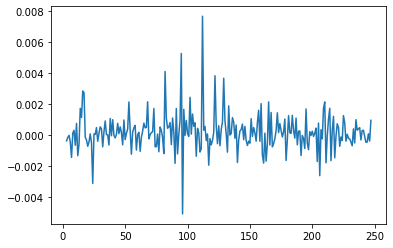

In [26]:
year_1 = np.array([[pnl[i]] for i in range(0, 248)])
x = np.arange(0, 248, 1)
plt.plot(x, year_1)
print(np.mean(pnl))

0.00010826620436155304


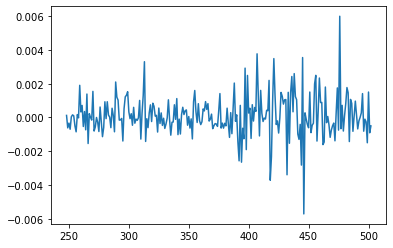

In [21]:
year_2 = np.array([[pnl[i]] for i in range(248, 503)])
x = np.arange(248, 503, 1)
plt.plot(x, year_2)
print(np.mean(year_2))

4.535817122836482e-05


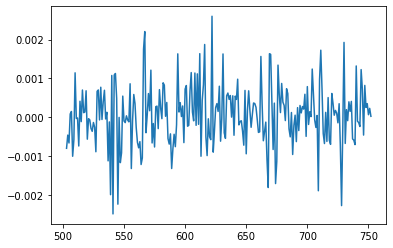

In [22]:
year_3 = np.array([[pnl[i]] for i in range(503, 753)])
x = np.arange(503, 753, 1)
plt.plot(x, year_3)
print(np.mean(year_3))

8.746214247073834e-05


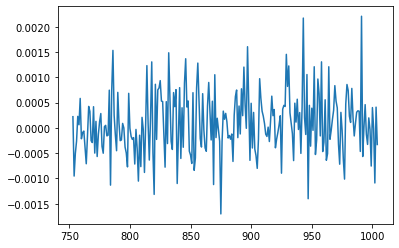

In [23]:
year_4 = np.array([[pnl[i]] for i in range(753, 1005)])
x = np.arange(753, 1005, 1)
plt.plot(x, year_4)
print(np.mean(year_4))

-3.023798863554006e-05


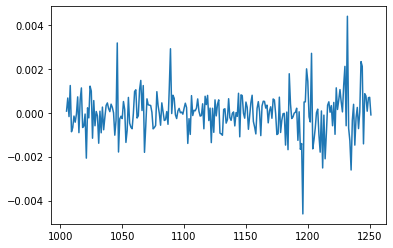

In [24]:
year_5 = np.array([[pnl[i]] for i in range(1005, 1252)])
x = np.arange(1005, 1252, 1)
plt.plot(x, year_5)
print(np.mean(year_5))

In [136]:
print(stocks[343])
print(stocks_dict['fbp'])
print(open_price['fbp'][250])
print(high_price['fbp'][250])
print(low_price['fbp'][250])
print(close_price['fbp'][250])
print('\n')
print(open_price['fbp'][251])
print(high_price['fbp'][251])
print(low_price['fbp'][251])
print(close_price['fbp'][251])
print('\n')
print(close_price['fbp'][252])
print(open_price['fbp'][252])
print(high_price['fbp'][252])
print(low_price['fbp'][252])
print('\n')
print(close_price['fbp'][275])
print(close_price['fbp'][276])
r[173][1474]
print(Q[274][350])
print(alpha[268][350])
print(np.mean(Q[268]))
print(np.sum(np.absolute(alpha)[268]))

aa


KeyError: 'fbp'

In [ ]:
close

In [55]:
summ = 0
for j in range(0, 379):
        summ += alpha[250][j] * r[251][j]
        print(j)
        print(alpha[250][j] * r[251][j])
        print(summ)

0
-3.353302446388674e-06
-3.353302446388674e-06
1
5.1518212566324875e-06
1.7985188102438134e-06
2
-2.4241757209442978e-06
-6.256569107004844e-07
3
-3.864284105689465e-06
-4.48994101638995e-06
4
-1.9339287198064598e-05
-2.3829228214454548e-05
5
6.095076110786033e-06
-1.7734152103668514e-05
6
0.0
-1.7734152103668514e-05
7
-2.4922626326698733e-06
-2.0226414736338387e-05
8
-9.941269142026795e-07
-2.1220541650541066e-05
9
2.5717524830308293e-05
4.496983179767227e-06
10
2.442056741755684e-06
6.939039921522911e-06
11
0.00026142828986728894
0.00026836732978881186
12
-4.7290164123598075e-06
0.0002636383133764521
13
1.5436562042224413e-05
0.0002790748754186765
14
-3.521917857247115e-05
0.00024385569684620535
15
-6.858530883593417e-06
0.00023699716596261192
16
7.220310513702846e-05
0.0003092002710996404
17
0.00030548361220312067
0.000614683883302761
18
2.2974936017073976e-05
0.000637658819319835
19
0.0
0.000637658819319835
20
8.050679401001809e-05
0.000718165613329853
21
-1.1864295410250485e-05
0